weight, bias:[1. 0.]  1.0
weight, bias:[ 1. -1.]  0.0
weight, bias:[-1. -1.]  -1.0
weight, bias:[ 0. -1.]  0.0
weight, bias:[ 1. -1.]  1.0
weight, bias:[ 1. -2.]  0.0
weight, bias:[-1. -2.]  -1.0
weight, bias:[ 0. -2.]  0.0
weight, bias:[ 1. -2.]  1.0
weight, bias:[-1. -2.]  0.0
weight, bias:[ 0. -2.]  1.0
weight, bias:[-2. -2.]  0.0
weight, bias:[-1. -2.]  1.0
weight, bias:[ 0. -2.]  2.0
weight, bias:[ 0. -3.]  1.0
weight, bias:[-2. -3.]  0.0
weight, bias:[-1. -3.]  1.0
weight, bias:[ 0. -3.]  2.0
weight, bias:[-2. -3.]  1.0
weight, bias:[-1. -3.]  2.0
weight, bias:[-3. -3.]  1.0
weight, bias:[-2. -3.]  2.0
weight, bias:[-1. -3.]  3.0
weight, bias:[-1. -4.]  2.0
weight, bias:[-3. -4.]  1.0
weight, bias:[-2. -4.]  2.0
weight, bias:[-1. -4.]  3.0
weight, bias:[-3. -4.]  2.0
weight, bias:[-2. -4.]  3.0
weight, bias:[-1. -2.]  4.0
weight, bias:[-1. -3.]  3.0
weight, bias:[-1. -4.]  2.0
weight, bias:[-3. -4.]  1.0
weight, bias:[-2. -4.]  2.0
weight, bias:[-1. -4.]  3.0
weight, bias:[-3. -4

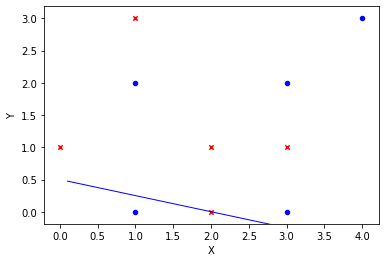

In [4]:
#%%
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
os.chdir("F:\project\perceptron");

def loaddata(a):
    if a==1 :
        data = np.loadtxt('test.txt')
    else:
        data = np.loadtxt('testnonlinear.txt')
    datamat = data[:,0:2]
    labelmat = data[:,2]
    return datamat, labelmat
    
def sign(val):
    if val >= 0:
        return 1
    else :
        return -1

def perceptron(datamat, labelmat, eta, runt):
    m,n = datamat.shape
    weight = np.zeros(n)
    bias = 0
    rt = 0

    flag = True
    while flag:
        for i in range(m):
            if (np.any(labelmat[i] * (np.dot(weight, datamat[i]) + bias) <=0)) and (rt <= runt):
                weight = weight + eta*labelmat[i] * datamat[i].T
                bias  = bias + eta* labelmat[i]
                print("weight, bias:", end = "")
                print(weight, end="  ")
                print(bias)
                flag = True
                rt = rt + 1
                break
            else:
                flag = False
    return weight, bias


def plotresult(datamat, labelmat, weight, bias):
    fig = plt.figure()
    axes = fig.add_subplot(111)

    type1_x = []
    type1_y = []
    type2_x = []
    type2_y = []
    for i in range(len(labelmat)):
        if (labelmat[i] == -1):
            type1_x.append(datamat[i][0])
            type1_y.append(datamat[i][1])

        if (labelmat[i] == 1):
            type2_x.append(datamat[i][0])
            type2_y.append(datamat[i][1])

    type1 = axes.scatter(type1_x, type1_y, marker='x', s=20, c='red')
    type2 = axes.scatter(type2_x, type2_y, marker='o', s=20, c='blue')

    y = (0.1 * -weight[0] / weight[1] + -bias / weight[1], 4.0* -weight[0] / weight[1] + -bias / weight[1])
    axes.add_line(Line2D((0.1,4.0), y, linewidth=1, color = 'blue'))

    plt.xlabel('X')
    plt.ylabel('Y')

    plt.show()


if __name__ == "__main__":
    datamat, labelmat = loaddata(0) % 参数1 载入线性数据集   1以外载入非线性数据集
    # 0: nonliear dataset  1:liear dataset
    weight, bias = perceptron(datamat, labelmat, 1, 255)
    plotresult(datamat, labelmat, weight, bias)

